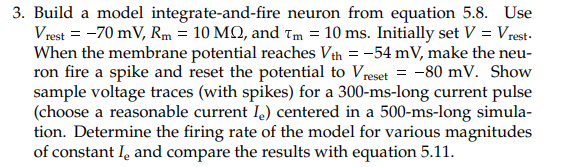

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

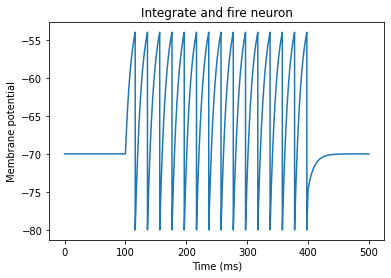

In [ ]:
# defining parameters
V_reset = -80 # mV
V_th = -54 # mV
V_rest = -70 # mV
R_m = 10 # M Ohm
tau_m = 10 # ms
dt = 0.01 # ms
t_max = 500 # ms
I_e = 2 # mA

# time vector
t = np.arange(0, t_max, dt)

# membrane potential initialization
V = np.zeros(len(t))
V[0] = V_rest

# simulate neuron
for i in range(1, len(t)):
  if t_max/2 - 150 <= t[i] <= t_max/2 + 150:
    I = I_e
  else:
    I = 0
  dV_dt = ((V_rest - V[i-1]) + R_m * I) / tau_m
  V[i] = V[i - 1] + dV_dt * dt
  if V[i] >= V_th:
    V[i] = V_reset

#plotting the model
fig, ax = plt.subplots()
ax.plot(t, V)
ax.set(xlabel = "Time (ms)", ylabel = "Membrane potential", title = "Integrate and fire neuron")
plt.show()

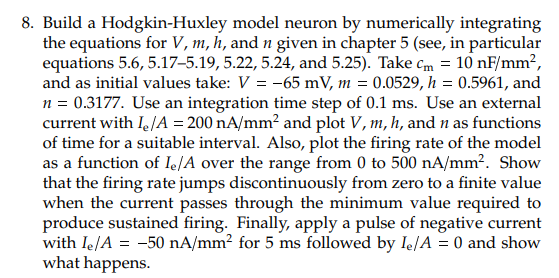

[Text(0, 0.5, 'Firing rate (Hz)'), Text(0.5, 0, 'I_e/A (nA/mm^2)')]

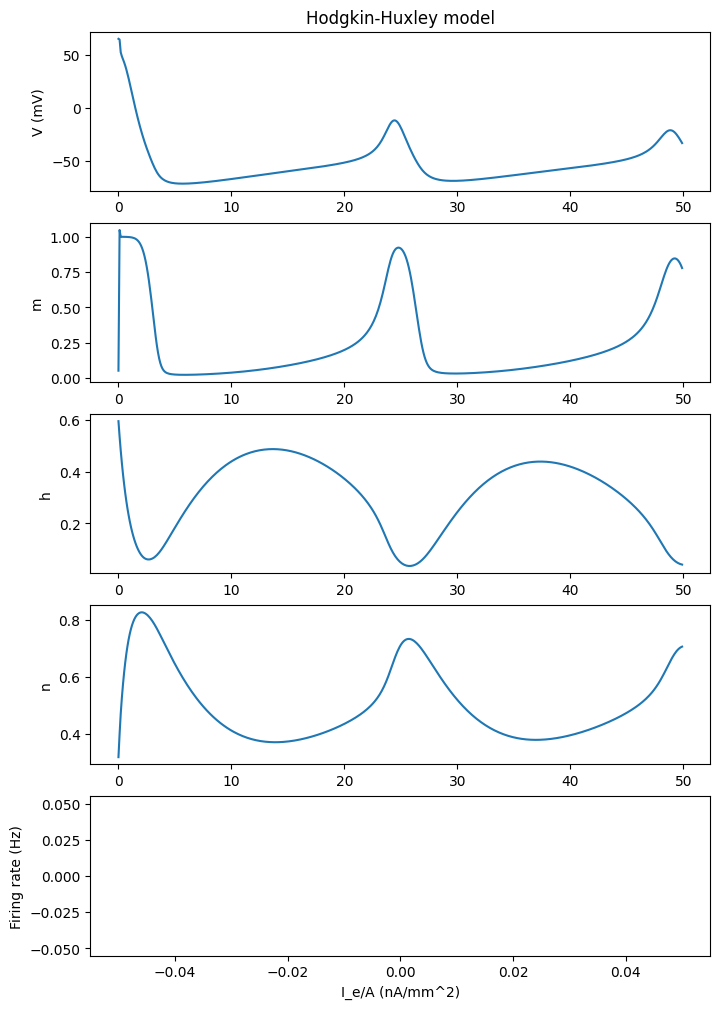

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
C_m = 10     # nF/mm^2 Capacitance of membrane
g_K = 36     # mS/mm^2 Potassium
g_Na = 120   # mS/mm^2 Sodium channel
g_L = 0.3    # mS/mm^2 Leak
E_K = -77    # mV Reversal potential potassium
E_Na = 50    # mV rev pot sodium
E_L = -54.4  # mV Rev Pot Leak chann

# Initial conditions
V0 = 65
m0 = 0.0529
h0 = 0.5961
n0 = 0.3177

# External current
I_e = 200  # nA/mm^2

# Time step and duration
dt = 0.1  # ms
t_max = 50  # ms

# Time vector
t = np.arange(0, t_max, dt)

# Initialize variables
V = np.zeros(len(t))
m = np.zeros(len(t))
h = np.zeros(len(t))
n = np.zeros(len(t))

# Initial conditions
V[0] = V0
m[0] = m0
h[0] = h0
n[0] = n0

# Define function for membrane current
def i_m(V, m, h, n):
    return g_L * (V - E_L) + g_K * n**4 * (V - E_K) + g_Na * m**3 * h * (V - E_Na)

#firing_rates = []

for i in range(1, len(t)):
    # Update gating variables
    alpha_m = 0.1 * (V[i-1] + 40) / (1 - np.exp(-0.1 * (V[i-1] + 40)))
    beta_m = 4 * np.exp(-0.0556 * (V[i-1] + 65))
    alpha_h = 0.07 * np.exp(-0.05 * (V[i-1] + 65))
    beta_h = 1 / (1 + np.exp(-0.1 * (V[i-1] + 35)))
    alpha_n = 0.01 * (V[i-1] + 55) / (1 - np.exp(-0.1 * (V[i-1] + 55)))
    beta_n = 0.125 * np.exp(-0.0125 * (V[i-1] + 65))
    m[i] = m[i-1] + dt * (alpha_m * (1 - m[i-1]) - beta_m * m[i-1])
    h[i] = h[i-1] + dt * (alpha_h * (1 - h[i-1]) - beta_h * h[i-1])
    n[i] = n[i-1] + dt * (alpha_n * (1 - n[i-1]) - beta_n * n[i-1])
    # Update membrane potential
    V[i] = V[i-1] + dt * (I_e/C_m - i_m(V[i-1], m[i-1], h[i-1], n[i-1])) / C_m


# Plot results
fig, axs = plt.subplots(5, 1, figsize=(8, 12))
#membrane potential
axs[0].plot(t, V)
axs[0].set(ylabel='V (mV)', title='Hodgkin-Huxley model')

axs[1].plot(t, m)
axs[1].set(ylabel='m', title='')

axs[2].plot(t, h)
axs[2].set(ylabel='h', title='')

axs[3].plot(t, n)
axs[3].set(ylabel='n', title='')

axs[4].plot()
axs[4].set(ylabel='Firing rate (Hz)', xlabel='I_e/A (nA/mm^2)')